In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [2]:
from tensorboard.backend.event_processing import event_accumulator

def parse_tensorboard(path, scalar):
    """returns a dictionary of pandas dataframes for each requested scalar"""
    ea = event_accumulator.EventAccumulator(
        path,
        size_guidance={event_accumulator.SCALARS: 0},
    )
    _absorb_print = ea.Reload()

    if 'CelebAGAN' in path:
        iter_per_epoch = 1272.0
    elif 'DemoRegWDL' in path:
        iter_per_epoch = 1800.0
    return {'epoch': np.array([ea.Scalars(scalar)[i].step/iter_per_epoch for i in range(len(ea.Scalars(scalar)))]),
            'value': np.array([ea.Scalars(scalar)[i].value for i in range(len(ea.Scalars(scalar)))])}


In [3]:
def plot_case(path, scalar, n):
    print('started!')
    results = [parse_tensorboard(f'{path}/version_{i}', scalar) for i in range(n)]
    print('parsed!')
    
    meanres = {}
    meanres['epoch'] = results[0]['epoch']
    meanres['value'] = results[0]['value']/n

    for i in range(1, n):
        meanres['value'] += results[i]['value']/n

    return results, meanres

2
started!
parsed!
started!
parsed!
3
started!
parsed!
started!
parsed!
4
started!
parsed!
started!
parsed!
5
started!
parsed!
started!
parsed!


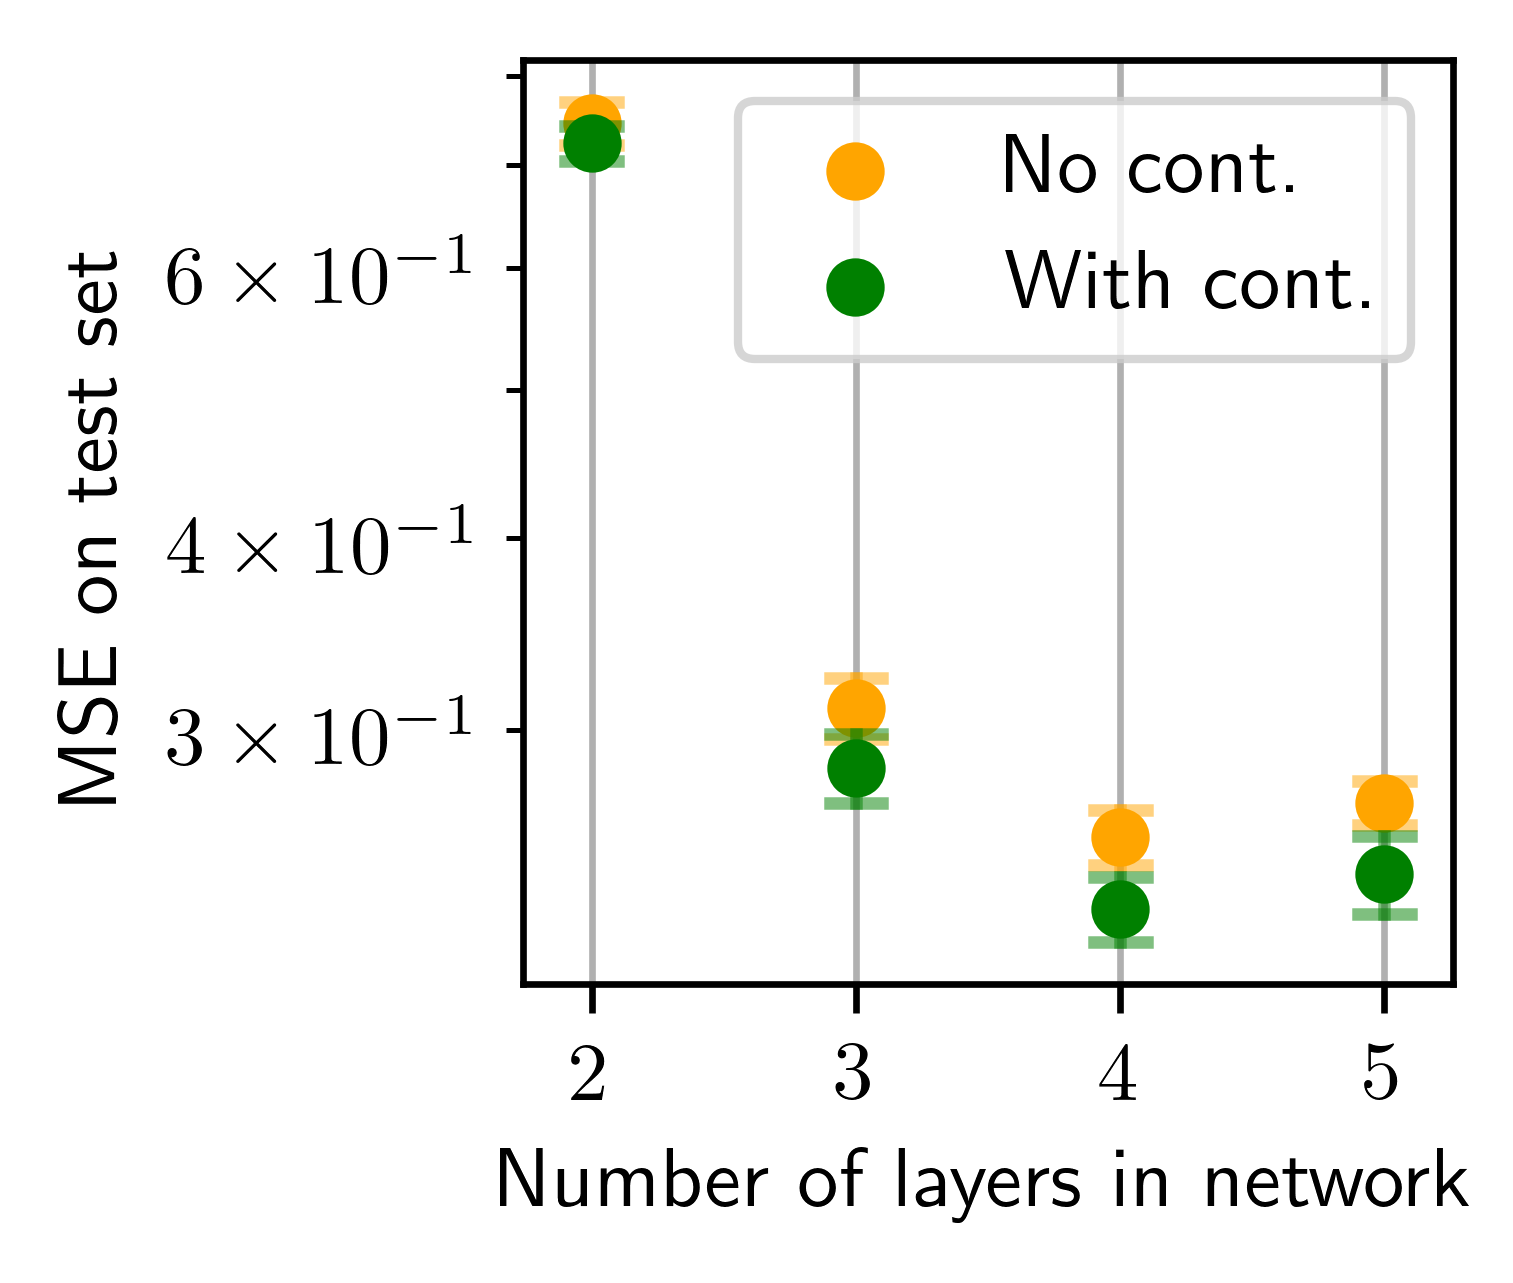

In [4]:
scalar = 'val_loss'
n = 5

plt.figure(figsize=(2, 2), dpi=600)

n_layer_list = [2, 3, 4, 5]

for i, n_layers in enumerate(n_layer_list):
    print(n_layers)
    for lambda0, contlr, color in zip(['nan', -9.2103], [0.0100, 0.0100], ['orange', 'green']):
        #results, meanres = plot_case(f'out_DemoRegSpikyL{n_layers}_200_{lambda0}_nan_{contlr:.4f}_0.0000_20.0000', scalar, n)
        results, meanres = plot_case(f'out_DemoRegWDL{n_layers}_100_{lambda0}_nan_{contlr:.4f}_0.0000_20.0000', scalar, n)
        
        if lambda0 == 'nan':
            label = 'No cont.'
        else:
            label = 'With cont.'#f'$\lambda_0 = \exp({lambda0})$'
        
        samples = []

        for j, result in enumerate(results):
            #plt.scatter(n_layers, result['value'][-1], color=color, alpha=0.1, zorder=-1)
            samples.append(result['value'][-1])

        mean = meanres['value'][-1]
        stdev = np.std(samples)

        plt.plot([n_layers, n_layers], [mean - stdev, mean + stdev], color=color, alpha=0.5, zorder=10+i)
        plt.plot([n_layers-0.1, n_layers+0.1], [mean - stdev, mean - stdev], color=color, alpha=0.5, zorder=10+i)
        plt.plot([n_layers-0.1, n_layers+0.1], [mean + stdev, mean + stdev], color=color, alpha=0.5, zorder=10+i)
    
        if i == 0:
            plt.scatter(n_layers, mean, color=color, alpha=1, label=label, zorder=10+i)
        else:
            plt.scatter(n_layers, mean, color=color, alpha=1, zorder=10+i)

plt.xlabel('Number of layers in network')
plt.ylabel('MSE on test set')
plt.xticks(n_layer_list)
plt.yscale('log')
plt.grid()
plt.legend(loc='best')